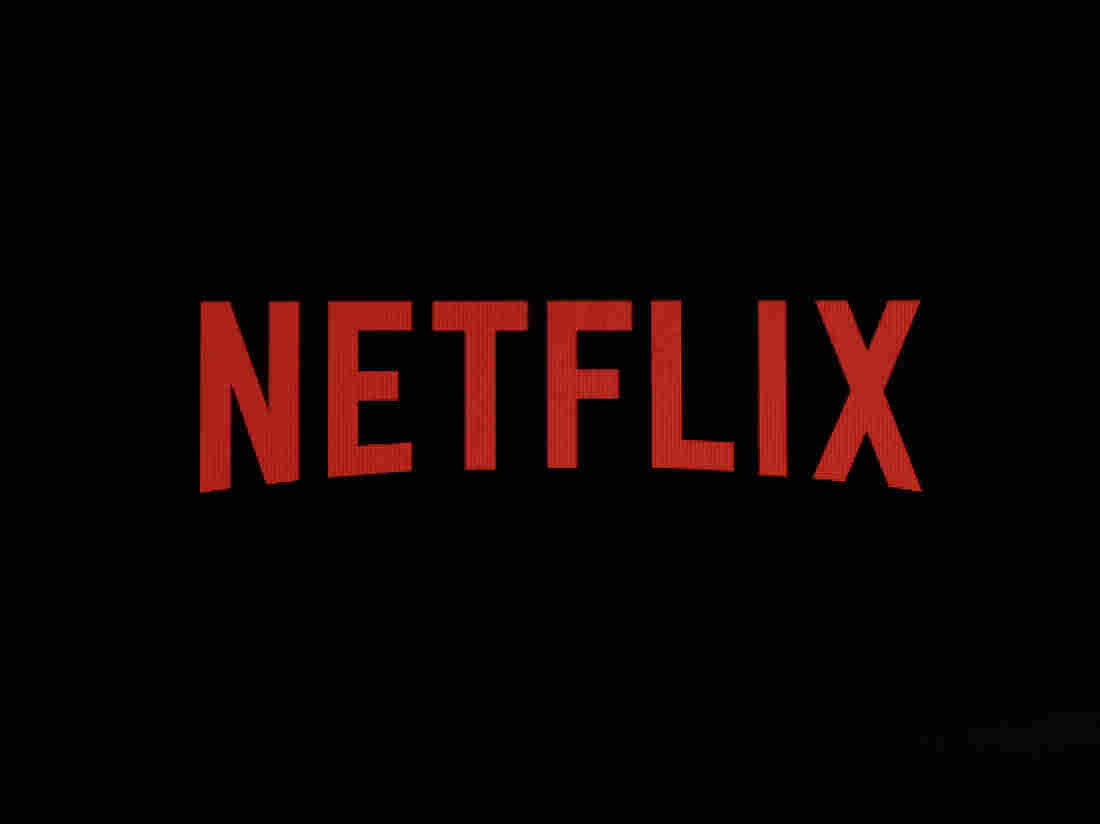

## 1. Import libraries

In [ ]:
# importing the libraries for vizualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## 2. Read the file, check for NA's and clean the data

In [ ]:
df_Netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [ ]:
df_Netflix.head()

In [ ]:
# Let us remove the rows which has country as blank
for i in df_Netflix.columns:
    null_rate = df_Netflix[i].isna().sum() / len(df_Netflix) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

In [ ]:
# Let's remove the nulls from the country column
df_Netflix.dropna(subset=['country'], inplace=True)

In [ ]:
df_Netflix.head()

In [ ]:
df_Netflix["country"]= df_Netflix["country"].astype(str)

In [ ]:
df_Netflix.count()

In [ ]:
# as there are multiple values in the column country let us clean that
# Credits to this github link - https://gist.github.com/jlln/338b4b0b55bd6984f883

def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [ ]:
df_Netflix.head(10)

In [ ]:
df_Netflix=splitDataFrameList(df_Netflix, 'country', ',')

In [ ]:
df_Netflix.count()

In [ ]:
df_Netflix.head(20)

## 3. Exploratory Data Analysis

### Let us check the count of TV shows vs Movies

In [ ]:
sns.countplot(x="type", data=df_Netflix)

#### This plot shows that the number of movies are greater in Netflix as compared to TV Shows

### Let us check the country wise TV shows/movies

In [ ]:
CountryPlot=sns.countplot(x="country", data=df_Netflix, order=df_Netflix.country.value_counts().iloc[:10].index)
for item in CountryPlot.get_xticklabels():
    item.set_rotation(90)

#### This plot shows that the maximum number of shows/movies are in US followed by India and then UK

### Let us see which are the directors who have contributed most to Netflix

In [ ]:
DirectorPlot=sns.countplot(x="director", data=df_Netflix, order=df_Netflix.director.value_counts().iloc[:10].index)
for item in DirectorPlot.get_xticklabels():
    item.set_rotation(90)

#### Raul Campos, Jan Suter have contributed the most to Netflix

###  Let us which year had the maximum contribution

In [ ]:
ReleaseYear_Plot=sns.countplot(x="release_year", data=df_Netflix, order=df_Netflix.release_year.value_counts().iloc[:10].index)
for item in ReleaseYear_Plot.get_xticklabels():
    item.set_rotation(90)

#### 1. The maximum contributions were made in the year 2018 and 2017, it would not be a good idea to consider 2019 for our analysis as the data for this is available till November.
##### 2. Also there is a sudden jump in content from 2014-2015 and 2015-2016

### Let us check the split of type each year

In [ ]:
df_Plot_1 = pd.crosstab(index=df_Netflix["release_year"], 
                          columns=df_Netflix["type"])
df_Plot_1['Total'] = df_Plot_1['Movie'] + df_Plot_1['TV Show']
df_Plot_1_Top_10 = df_Plot_1.sort_values('Total',ascending = False).head(10)
df_Plot_1_Top_10.drop(['Total'], axis=1, inplace=True)

In [ ]:
df_Plot_1_Top_10.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

#### We can clearly see that the TV shows are getting popular

### Let us check the split of type vs country

In [ ]:
df_Plot_2 = pd.crosstab(index=df_Netflix["country"], 
                          columns=df_Netflix["type"])
df_Plot_2['Total'] = df_Plot_2['Movie'] + df_Plot_2['TV Show']
df_Plot_2_Top_10 = df_Plot_2.sort_values('Total',ascending = False).head(10)
df_Plot_2_Top_10.drop(['Total'], axis=1, inplace=True)
df_Plot_2_Top_10

In [ ]:
df_Plot_2_Top_10.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

#### 1. US and India has more movies as comapred to TV Shows
##### 2. Japan and South Korea have more TV shows than movies in Netflix

### Let us check the rating vs type graph

In [ ]:
df_Plot_3 = pd.crosstab(index=df_Netflix["rating"], 
                          columns=df_Netflix["type"])
df_Plot_3['Total'] = df_Plot_3['Movie'] + df_Plot_3['TV Show']
df_Plot_3_Top_10 = df_Plot_3.sort_values('Total',ascending = False).head(10)
df_Plot_3_Top_10.drop(['Total'], axis=1, inplace=True)
df_Plot_3_Top_10

In [ ]:
df_Plot_3_Top_10.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

#### Most of the content is from TV-MA (suitable for 17+) followed by TV-14 (unsuitable for children below 14 years)

## 4. EDA for one country

### Let us continue our analysis for one country only (let us take India for now)

In [ ]:
# There are few other rows in country which has India in them, for now let us ignore them and filter only on India

In [ ]:
# We shall filter only one country (India) for now and continue the analysis

df_India_Netflix = df_Netflix.loc[df_Netflix['country'] == 'India']

In [ ]:
df_India_Netflix.head()

In [ ]:
df_India_Netflix.dtypes

In [ ]:
## Let us first check when did Netflix come to India, we will see the min for the date_added ()

df_India_Netflix["date_added"] = df_India_Netflix["date_added"].apply(pd.to_datetime)

In [ ]:
df_India_Netflix.dtypes

In [ ]:
min_df_India_Netflix=min(df_India_Netflix['date_added'])
min_df_India_Netflix

In [ ]:
# Let us extract the row which has the minimum date and see which was the first NEtflix movie/TV shwo addition to India

df_India_Netflix[df_India_Netflix['date_added'] == min_df_India_Netflix]

### Let us see what is more popular in India (TV Shows or Movies)

In [ ]:
sns.countplot(x="type", data=df_India_Netflix)

#### Movies are a clear win !

### Let us check about the directors contributing most to Netflix India

In [ ]:
India_DirectorPlot=sns.countplot(x="director", data=df_India_Netflix, order=df_India_Netflix.director.value_counts().iloc[:10].index)
for item in India_DirectorPlot.get_xticklabels():
    item.set_rotation(90)

#### We can see that SS Rajamouli has contributed most in Netflix India

In [ ]:
# Let us check the addition by the director
df_India_Netflix[df_India_Netflix['director'] == 'S.S. Rajamouli']

In [ ]:
# It is clear that there are 2 movies only which are repeated in different languages, hence the count is more

In [ ]:
df_India_Netflix[df_India_Netflix['director'] == 'Rajiv Mehra']

In [ ]:
# It is actally Rajiv Mehra who has contributed more in terms of number of movies

### Let us check in which year was most of the content added

In [ ]:
India_ReleaseYear_Plot=sns.countplot(x="release_year", data=df_India_Netflix, order=df_India_Netflix.release_year.value_counts().iloc[:10].index)
for item in India_ReleaseYear_Plot.get_xticklabels():
    item.set_rotation(90)

#### 2017 had the major releases followed by 2018
##### Also, there was a jump from 2016 to 2017 in the content added to Netflix India

### Let us check the rating's trend

In [ ]:
India_Rating_Plot=sns.countplot(x="rating", data=df_India_Netflix, order=df_India_Netflix.rating.value_counts().iloc[:10].index)
for item in India_Rating_Plot.get_xticklabels():
    item.set_rotation(90)

#### most of the content lies in the TV-14 (unsuitable for children below 14) category

### Let us check if the trend of TV shows vs Movies has changed over the years

In [ ]:
df_Plot_India_1 = pd.crosstab(index=df_India_Netflix["release_year"], 
                          columns=df_India_Netflix["type"])
df_Plot_India_1['Total'] = df_Plot_India_1['Movie'] + df_Plot_India_1['TV Show']
df_Plot_India_1_Top_10 = df_Plot_India_1.sort_values('Total',ascending = False).head(10)
df_Plot_India_1_Top_10.drop(['Total'], axis=1, inplace=True)

In [ ]:
df_Plot_India_1_Top_10.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

#### We can see there has been a slight increase in the TV show populartity in India Netflix

## This is my first notebook on Kaggle, please suggest the improvements that I can make :)